In this notebook we will be using the smtd_preprocessing.py file which is a preprocessing pileline for twitter data to pre-process our tweets and then train our own twitter embeddings. <br>
We can find pre-trained twitter embedding


In [3]:
# Install the Below Libraries for this Notebook
!pip install demoji

In [14]:
import os
import sys
import pandas as pd
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')

from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

# Upload smtd_preprocessing.py and sts_gold_tweet.csv present in Repository, if using Colab
try:
    from google.colab import files
    uploaded = files.upload()
    preprocessing_path = '05_smtd_preprocessing.py'

except ModuleNotFoundError:
    print('Not using colab')

    # Enter the Path to this Repository
    PATH = "path to repo"
    preprocessing_path = PATH+"/practical-nlp/Ch8/O5_smtd_preprocessing.py"
    sys.path.append(os.path.abspath(preprocessing_path))

import O5_smtd_preprocessing as smtd_preprocessing

Let's use the dir() function to find all the properties and methods in the package.

In [15]:
dir(preprocessing_path)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


## Read Data
Let's read the data. Normally in csv files the values are separated by a ','.<br> In this case, it is separated by a ';' so we will specify the delimiter as ';'.

In [16]:
try:
    from google.colab import files
    uploaded = files.upload()
    datapath = "./sts_gold_tweet.csv"
except ModuleNotFoundError:
    print('Not using colab')
    PATH = 'path to repo'
    datapath = PATH+'/practical-nlp/Ch8/Data/sts_gold_tweet.csv'
    sys.path.append(os.path.abspath(preprocessing_path))

df = pd.read_csv(datapath,error_bad_lines=False,delimiter=";")

In [17]:
#let's have a loof at the dataset
df.head()

,id,polarity,tweet
0,1467933112,0,the angel is going to miss the athlete this we...
1,2323395086,0,It looks as though Shaq is getting traded to C...
2,1467968979,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH
3,1990283756,0,drinking a McDonalds coffee and not understand...
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...


In [19]:
#pre-process tweets using our package
df['tweet'] = df['tweet'].apply(lambda x: smtd_preprocessing.process_TweetText(x))
df['tweet'] = df['tweet'].apply(lambda x: tweet_tokenizer.tokenize(x))
tweets = df['tweet'].values

## Train Embeddings
Let's train our own embeddings.

In [20]:
#CBOW
import time

start = time.time()
word2vec_tweet = Word2Vec(tweets,min_count=5, sg=0)
end = time.time()

print("CBOW Model Training Complete.\nTime taken for training is:{:.5f} sec ".format((end-start)))

CBOW Model Training Complete.
Time taken for training is:0.17739 sec 


In [25]:
#Summarize the loaded model
print("Summary of the model:",word2vec_tweet)

#Summarize vocabulary
words = list(word2vec_tweet.wv.index_to_key)
print("Small part of Vocabulary of our model:",words[:10])

#Acess vector for one word
print("Acess Vector for the word 'lol'",word2vec_tweet.wv['lol'])

Summary of the model: Word2Vec<vocab=774, vector_size=100, alpha=0.025>
Small part of Vocabulary of our model: ['!', '.', 'i', 'to', 'constantnonbrandmention', 'the', ',', 'and', 'a', 'my']
Acess Vector for the word 'lol' [-0.06121039  0.21341361  0.02448612  0.04820853  0.03380766 -0.36193344
  0.10122307  0.5929347  -0.2941175  -0.2172975  -0.15069057 -0.37021136
 -0.0484775   0.13909556  0.08467911 -0.14724514  0.2675398  -0.2583314
 -0.08206895 -0.5566945   0.10241666  0.05625414  0.14224666 -0.1690042
 -0.11766525  0.06561709 -0.28405294 -0.13078435 -0.21957955  0.17547381
  0.22974731 -0.01394627  0.06426329 -0.28530225 -0.22034934  0.41888726
  0.05034656 -0.14143755 -0.12387379 -0.4487328   0.09949899 -0.21870396
 -0.03803342  0.08658566  0.24741639 -0.10594832 -0.23904666 -0.08987797
  0.112564    0.18693453  0.15652715 -0.24493806 -0.00862612 -0.12713602
 -0.11867289  0.12081377  0.11021525  0.02672606 -0.16816041  0.20102061
  0.01823857 -0.0236446   0.11622469 -0.06577788 -

In [26]:
from gensim.models import Word2Vec, KeyedVectors #To load the model
import warnings
warnings.filterwarnings('ignore') #ignore any generated warnings

import numpy as np
import matplotlib.pyplot as plt #to generate the t-SNE plot
from sklearn.manifold import TSNE #scikit learn's TSNE

In [28]:
#Preprocessing our models vocabulary to make better visualizations
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

words_vocab= list(word2vec_tweet.wv.index_to_key)#all the words in the vocabulary.
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:50])

#Let us remove the stop words from this it will help making the visualization cleaner
stopwords_en = stopwords.words('english')
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("Size of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])
#The size didnt reduce much after removing the stop words so lets try visualizing only a selected subset of words


Size of Vocabulary: 774
Few words in Vocabulary ['!', '.', 'i', 'to', 'constantnonbrandmention', 'the', ',', 'and', 'a', 'my', '..', 'in', 'is', 'for', 'on', 'it', 'constantnum', 'you', 'of', '?', 'me', 'have', 'so', 'that', 'with', 'just', "i'm", 'was', 'but', 'not', 'at', 'this', 'be', 'now', 'up', 'get', 'all', 'no', 'go', 'are', 'got', 'from', '-', 'going', '"', 'constantalphanum', 'good', 'day', 'about', 'today']
Size of Vocabulary without stopwords: 654
Few words in Vocabulary without stopwords ['!', '.', 'constantnonbrandmention', ',', '..', 'constantnum', '?', "i'm", 'get', 'go', 'got', '-', 'going', '"', 'constantalphanum', 'good', 'day', 'today', 'love', 'headache', 'work', "can't", 'sad', 'like', 'constanturl', 'cancer', 'constanthashtag', 'back', 'cavs', 'iphone']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
#With the increase in the amount of data, it becomes more and more difficult to visualize and interpret
#In practice, similar words are combined into groups for further visualization.

keys = ['weekend','twitter','mcdonalds','coffee']
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in word2vec_tweet.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(word2vec_tweet.wv[similar_word])
    embedding_clusters.append(embeddings)#apending access vector of all similar words
    word_clusters.append(words)#appending list of all smiliar words

In [32]:
print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word only
print("Word Clousters:",word_clusters[:2])

Embedding clusters: [-0.06378569  0.18556532  0.02300013  0.05173573  0.01636096 -0.33914876
  0.07679929  0.5249663  -0.26706132 -0.18731342 -0.13179933 -0.32560098
 -0.05097808  0.13017285  0.08215872 -0.13391498  0.24736823 -0.23684251
 -0.05630962 -0.49885443  0.08869183  0.05537065  0.12543243 -0.14507404
 -0.12206543  0.06866422 -0.25393695 -0.11731747 -0.18314745  0.15140927
  0.19905335 -0.01179142  0.06890784 -0.24672225 -0.20598559  0.36563572
  0.04822585 -0.13113445 -0.10173961 -0.40537658  0.08586428 -0.20959876
 -0.01709004  0.06733634  0.2215261  -0.09418132 -0.21374694 -0.08454762
  0.10353686  0.1611232   0.14135447 -0.22430523 -0.01335906 -0.10565244
 -0.10780746  0.09574601  0.09887948  0.01800657 -0.15499435  0.17427972
  0.01056533 -0.01632524  0.09079082 -0.06619041 -0.26404622  0.19051512
  0.20764332  0.25808573 -0.32699013  0.23587954 -0.0917649   0.06243443
  0.1801183   0.06832024  0.23018071  0.10776589  0.08339802  0.04388707
 -0.2016884   0.14873612 -0.119

## Visualization
We will visualize our embeddings using T-SNE. If you do not know aht T-SNE is or have forgotten please refer to Ch3 in the book. We will be using the T-SNE code previously introduced in a notebook from Ch3 which can be found [here](https://github.com/practical-nlp/practical-nlp/blob/master/Ch3/09_Visualizing_Embeddings_Using_TSNE.ipynb).

In [33]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=1500, random_state=2020)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it

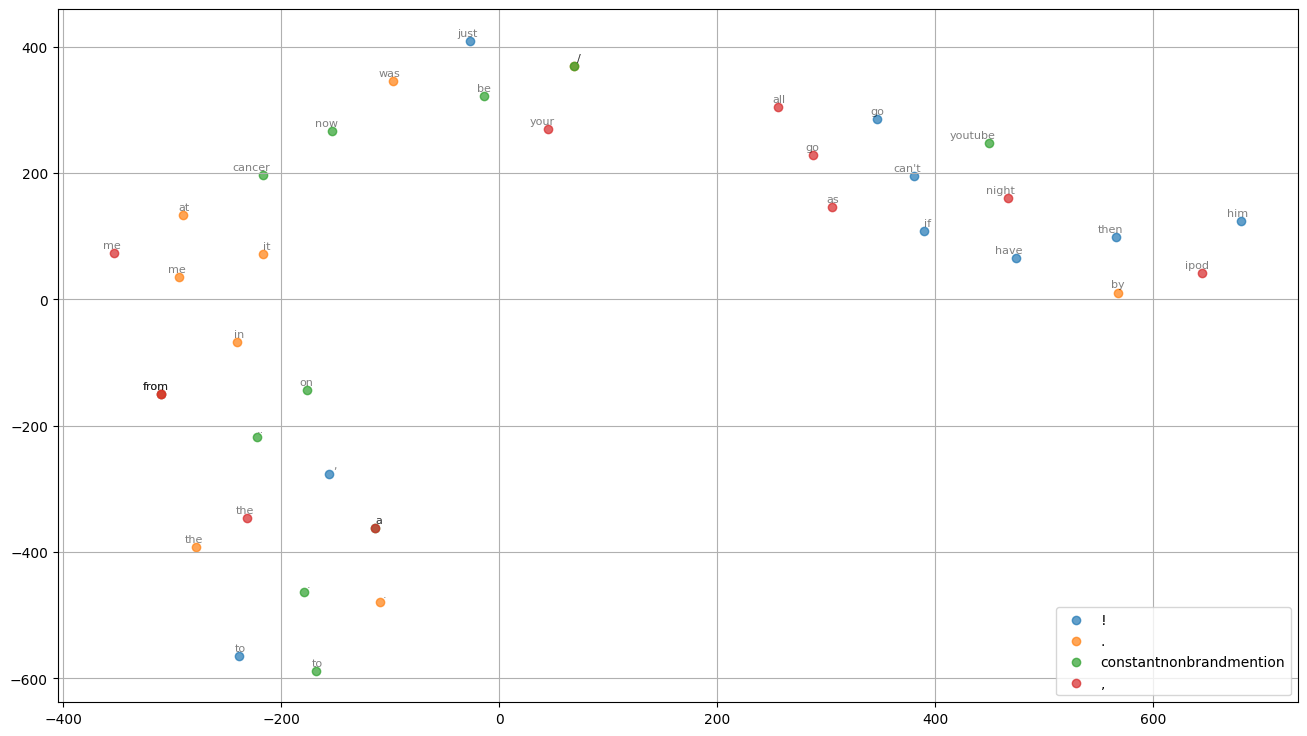

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))


    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)